2
4


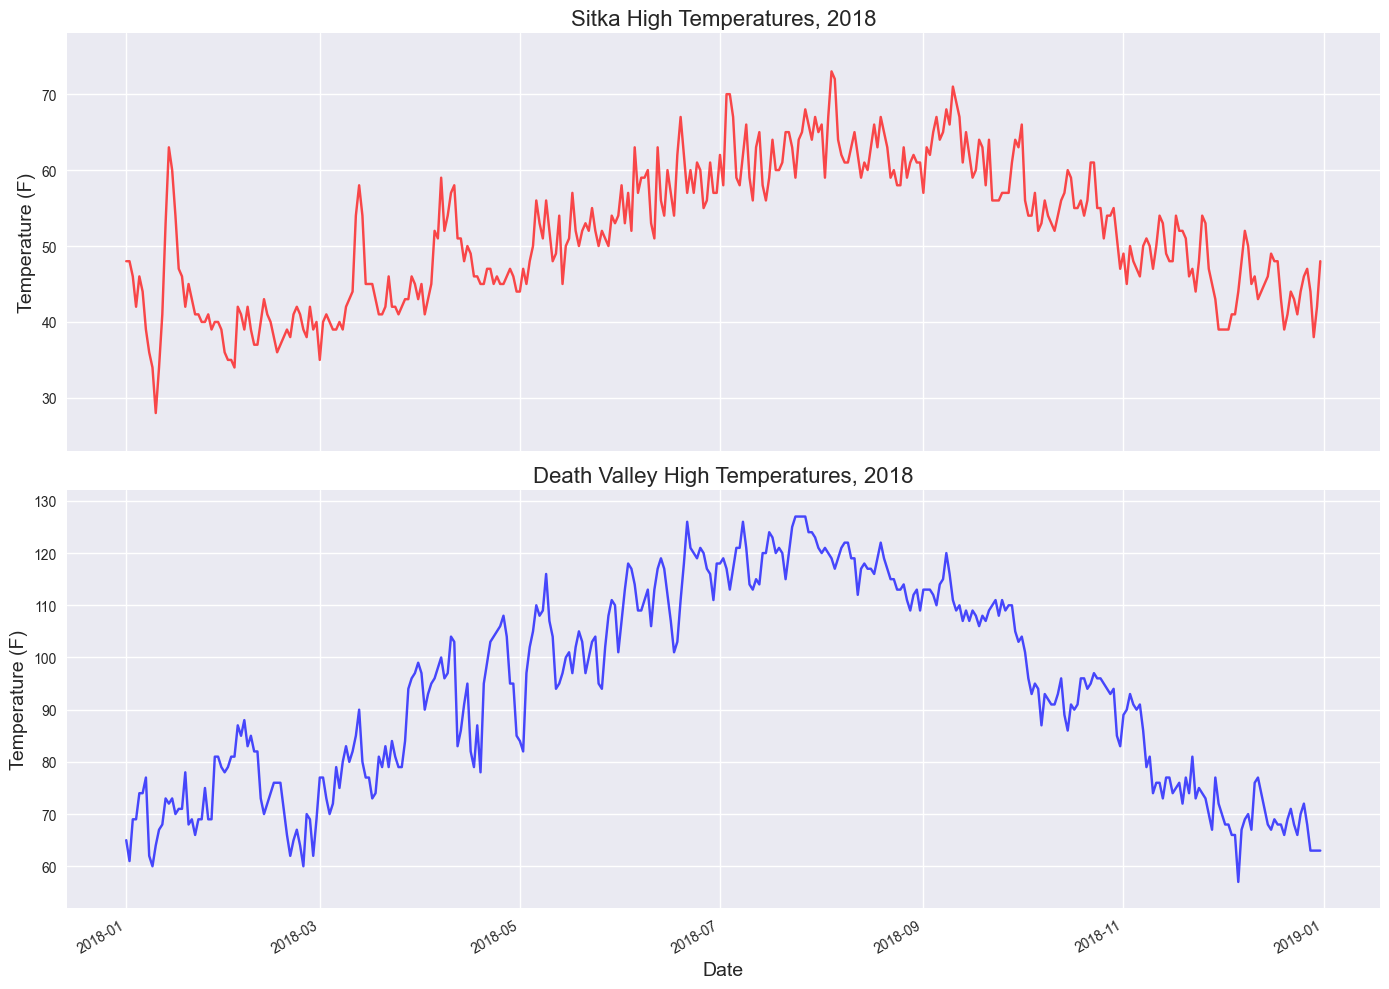

In [12]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt

sitka_file = "data/sitka_weather_2018_simple.csv"
death_valley_file = "data/death_valley_2018_simple.csv"

sitka_data = {}
death_valley_data = {}

# Read Sitka data
with open(sitka_file) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    tmax_index = header_row.index("TMAX")
    date_index = header_row.index("DATE")
  
    for row in reader:
        try:
            date = datetime.strptime(row[date_index], "%Y-%m-%d")
            tmax = int(row[tmax_index])
            sitka_data[date] = tmax
        except ValueError:
            pass  # Skip bad data

# Read Death Valley data
with open(death_valley_file) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    tmax_index = header_row.index("TMAX")
    date_index = header_row.index("DATE")

    for row in reader:
        try:
            date = datetime.strptime(row[date_index], "%Y-%m-%d")
            tmax = int(row[tmax_index])
            death_valley_data[date] = tmax
        except ValueError:
            pass  # Skip bad data

# Get common dates
common_dates = sorted(set(sitka_data.keys()) & set(death_valley_data.keys()))

# Build tmax lists
sitka_tmax = [sitka_data[date] for date in common_dates]
death_valley_tmax = [death_valley_data[date] for date in common_dates]

# Create figure with 2 Axes (stacked vertically)
plt.style.use("seaborn")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Sitka plot
ax1.plot(common_dates, sitka_tmax, c="red", alpha=0.7)
ax1.set_title("Sitka High Temperatures, 2018", fontsize=16)
ax1.set_ylabel("Temperature (F)", fontsize=14)
ax1.set_ylim(min(sitka_tmax) - 5, max(sitka_tmax) + 5)

# Death Valley plot
ax2.plot(common_dates, death_valley_tmax, c="blue", alpha=0.7)
ax2.set_title("Death Valley High Temperatures, 2018", fontsize=16)
ax2.set_ylabel("Temperature (F)", fontsize=14)
ax2.set_ylim(min(death_valley_tmax) - 5, max(death_valley_tmax) + 5)

# Format X-axis
fig.autofmt_xdate()
plt.xlabel("Date", fontsize=14)

plt.tight_layout()
plt.show()
